# Dog breed classifier

In [1]:
from fastai.vision.all import *

In [2]:
image_path = Path('../../input/dog-breeds')

## Data preparation
Rename the folders to lowercase and remove the class from the directory name

In [3]:
for folder in image_path.ls():
    if folder.is_dir:
        new_folder_name = '_'.join(map(str.lower, folder.name.split('-')[1:]))
        target = image_path / new_folder_name
        if not target.exists():
            folder.replace(target)

## Data loading

Create the datablock and load the data

In [14]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(64),
)

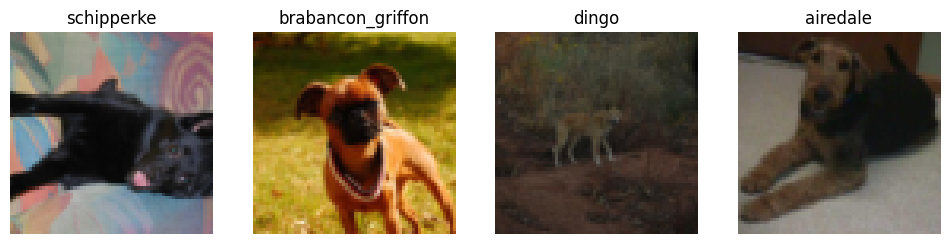

In [15]:
dls = dogs.dataloaders(image_path)
dls.valid.show_batch(max_n=4, nrows=1)

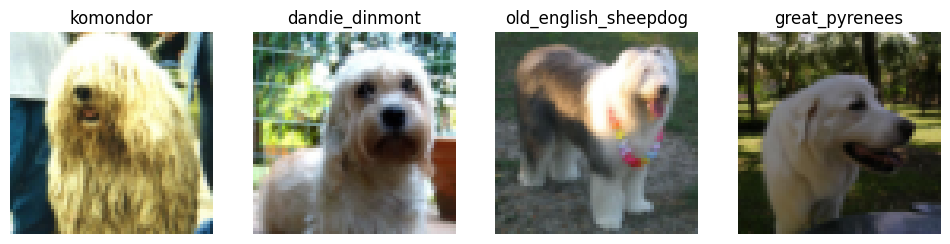

In [16]:
dls.train.show_batch(max_n=4, nrows=1)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(valley=0.0014454397605732083)

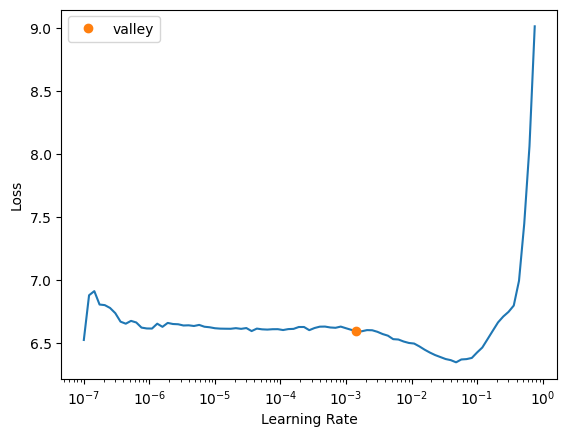

In [18]:
learn.lr_find()

In [19]:
bs = 32
learn.fine_tune(3, 1.5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,5.208311,4.220404,0.888727,03:40


epoch,train_loss,valid_loss,error_rate,time
0,4.060346,3.454392,0.801749,05:33
1,3.425760,3.039268,0.740525,05:18
2,2.949734,2.960207,0.722546,05:22
